#**Linear Regression**

####**Linear Regression**
####Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).
####In my project, I have predict house price of King country using some column of the dataset.

In [1]:
#mount form google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Install Pyspark

In [2]:
# Install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=e9b960f9226aa0cc9bf280a4019631659283a7de31d1c40960e471c8fd483218
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [4]:
# Import SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.functions import count

spark = SparkSession.builder.appName('myApp').getOrCreate()

###Import Dataset

In [5]:
#upload files in df
df = spark.read.csv('/content/drive/MyDrive/bigdata/Housedata.csv', header=True, inferSchema=True)

In [6]:
#import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
# To see overview of dataset
df.toPandas()

,id,Year,Month,Date,DateTime,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,10,13,10/13/2014,"221,900.00",3,1.00,1180,5650,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,12,9,12/9/2014,"538,000.00",3,2.25,2570,7242,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,2,25,2/25/2015,"180,000.00",2,1.00,770,10000,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,12,9,12/9/2014,"604,000.00",4,3.00,1960,5000,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,2,18,2/18/2015,"510,000.00",3,2.00,1680,8080,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014,5,21,5/21/2014,"360,000.00",3,2.50,1530,1131,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015,2,23,2/23/2015,"400,000.00",4,2.50,2310,5813,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014,6,23,6/23/2014,"402,101.00",2,0.75,1020,1350,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015,1,16,1/16/2015,"400,000.00",3,2.50,1600,2388,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


###Checking the data types and nul values

In [8]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Date: integer (nullable = true)
 |-- DateTime: string (nullable = true)
 |-- price: string (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



###Copy dataset in another variable

In [9]:
newdata = df

In [10]:
#count the total number of rows
newdata.count()

21613

In [11]:
#count the total number of columns
len(newdata.columns)

24

###Five Number Summary

In [12]:
newdata.describe().toPandas()

,summary,id,Year,Month,Date,DateTime,price,bedrooms,bathrooms,sqft_living,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,count,21613,21613,21613,21613,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
1,mean,4.580301520864988E9,2014.3229537778188,6.574422801091935,15.68819691852126,None,None,3.37084162309721,2.1147573219821405,2079.8997362698374,...,7.656873178179799,1788.3906907879516,291.5090454818859,1971.0051357978994,84.40225790033776,98077.93980474715,47.56005251931704,-122.21389640494083,1986.552491556008,12768.455651691113
2,stddev,2.8765655713120522E9,0.4676160310451533,3.1153077787263648,8.635062534286034,None,None,0.930061831147451,0.770163157217741,918.4408970468096,...,1.1754587569743344,828.0909776519175,442.57504267746685,29.373410802386243,401.67924001917504,53.505026257472466,0.13856371024192368,0.14082834238139288,685.3913042527788,27304.179631338524
3,min,1000102,2014,1,1,1/10/2015,"1,000,000.00",0,0.0,290,...,1,290,0,1900,0,98001,47.1559,-122.519,399,651
4,max,9900000190,2015,12,31,9/9/2014,"999,999.00",33,8.0,13540,...,13,9410,4820,2015,2015,98199,47.7776,-121.315,6210,871200


#Cleaning the Data

In [13]:
#Here I remove the commas in the price column and make price to float type
from pyspark.sql.functions import regexp_replace
newdata = newdata.withColumn("price", regexp_replace("price", ",", "").cast("float"))

In [14]:
#Here I remove the id and date column which is unnecessary column
from pyspark.sql.functions import col
newdata = newdata.drop(col("id"),col("Date"))

In [15]:
#Now, check the dataset overview after changing 
newdata.toPandas()

,Year,Month,DateTime,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,10,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,12,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,12,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,2,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,5,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015,2,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014,6,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015,1,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
#Here I checked all the rows of the given column and remove that rows if there is any missing value
columns_to_check = ['Year', 'Month', 'DateTime', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                    'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
                    'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
newdata = newdata.dropna(subset=columns_to_check)


In [17]:
# check and count the number of duplicate rows 
duplicated_count = newdata.groupBy(newdata.columns).count().filter(col('count') > 1).count()
print(duplicated_count)

0


###Check positively or negatively skewness

<ipython-input-18-6fd193edd80b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_series)


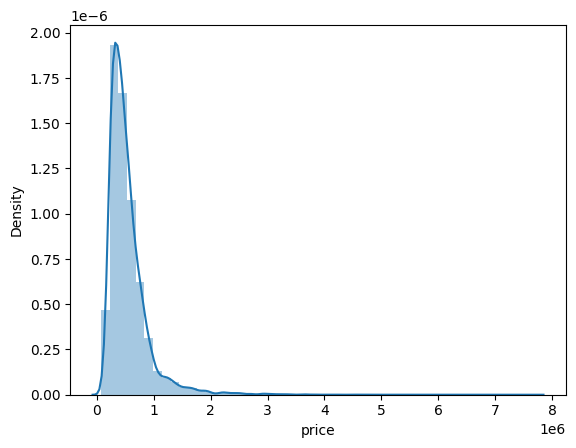

In [18]:
# At first we need to convert the new data to pandas dataframe and plot using seaborn (sns)
price_series = newdata.select('price').toPandas()['price']
sns.distplot(price_series)
plt.show()

In [19]:
#Now calculate the skewness and print
from pyspark.sql.functions import skewness
skewness_value = newdata.agg(skewness(newdata['price'])).collect()[0][0]
print("Skewness = ", skewness_value)


Skewness =  4.0237898581401605


We need to reduce the skewness.

###Reduce the skewness

In [20]:
from pyspark.sql.functions import log
newdata = newdata.withColumn("new_price", log(col("price")))
newdata.show()

+----+-----+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|Year|Month|  DateTime|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|
+----+-----+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|2014|   10|10/13/2014| 221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|12.309982108920686|
|2014|   12| 12/9/2014| 538000.0|       3|     2.25|       2570|    7242|   2.0|    

To reduce the skewness of the distrbution curve, the 'price' variable has been transformed using log transformation.

<ipython-input-21-1652db119ee3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_series)


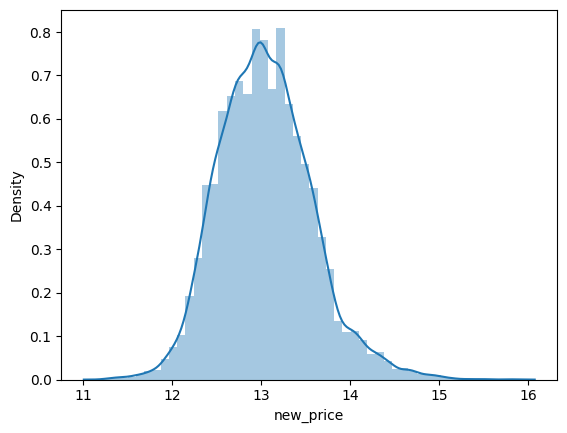

In [21]:
price_series = newdata.select('new_price').toPandas()['new_price']
sns.distplot(price_series)
plt.show()

Now the distribution of the transformed target variable is much closer to normal distribution than the untransformed variable.

In [22]:
#Now again, calculate the skewness and print after reducing
skewness_value = newdata.agg(skewness(newdata['new_price'])).collect()[0][0]
print("Skewness = ", skewness_value)

Skewness =  0.4280427656285427


###Checking the unique value

In [23]:
unique_years = newdata.select("Year").distinct().rdd.flatMap(lambda x: x).collect()
print(unique_years)



[2015, 2014]


###Reset the index

In [24]:
from pyspark.sql.functions import monotonically_increasing_id
newdata = newdata.withColumn("index", monotonically_increasing_id())
newdata = newdata.drop("index")

###Convert float value into integer

In [25]:
newdata = newdata.withColumn("floors", col("floors").cast("integer"))
newdata = newdata.withColumn("zipcode", col("zipcode").cast("string"))

In [26]:
newdata.show()

+----+-----+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|Year|Month|  DateTime|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|
+----+-----+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|2014|   10|10/13/2014| 221900.0|       3|      1.0|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|12.309982108920686|
|2014|   12| 12/9/2014| 538000.0|       3|     2.25|       2570|    7242|     2|    

#Plotting the graph & Analyze

In [27]:
newdata.columns

['Year',
 'Month',
 'DateTime',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'new_price']

In [28]:
newdata.show()

+----+-----+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|Year|Month|  DateTime|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|
+----+-----+----------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|2014|   10|10/13/2014| 221900.0|       3|      1.0|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|12.309982108920686|
|2014|   12| 12/9/2014| 538000.0|       3|     2.25|       2570|    7242|     2|    

In [29]:
import pandas as pd
#to visulalize we need to convert it to pandas dataframe
newdata = newdata.toPandas()
# convert 'DateTime' column to datetime object
newdata['DateTime'] = pd.to_datetime(newdata['DateTime'])

# group data by year and month and calculate mean HPI
HPI_df = newdata.groupby(['Year', newdata['DateTime'].dt.strftime('%Y-%m')]).mean()

# reset index
HPI_df = HPI_df.reset_index()

# print HPI_df
print(HPI_df)



    Year DateTime  Month        price  bedrooms  bathrooms  sqft_living  \
0   2014  2014-05    5.0  548080.3125  3.389706   2.139847  2114.912896   
1   2014  2014-06    6.0  558002.1875  3.418349   2.163876  2132.820642   
2   2014  2014-07    7.0  544788.8125  3.391678   2.146540  2128.246495   
3   2014  2014-08    8.0  536445.2500  3.355670   2.123067  2084.762887   
4   2014  2014-09    9.0  529253.8125  3.360203   2.130919  2077.375986   
5   2014  2014-10   10.0  539027.0000  3.360490   2.118876  2083.896166   
6   2014  2014-11   11.0  521961.0000  3.333806   2.079376  2048.768958   
7   2014  2014-12   12.0  524461.8750  3.390891   2.102991  2091.339225   
8   2015  2015-01    1.0  525870.8750  3.387526   2.129346  2085.094070   
9   2015  2015-02    2.0  507851.3750  3.340000   2.059600  2010.974400   
10  2015  2015-03    3.0  543977.1875  3.367467   2.065333  2021.968533   
11  2015  2015-04    4.0  561837.8125  3.364859   2.106006  2060.377409   
12  2015  2015-05    5.0 

<ipython-input-29-f4d2408ba24e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  HPI_df = newdata.groupby(['Year', newdata['DateTime'].dt.strftime('%Y-%m')]).mean()


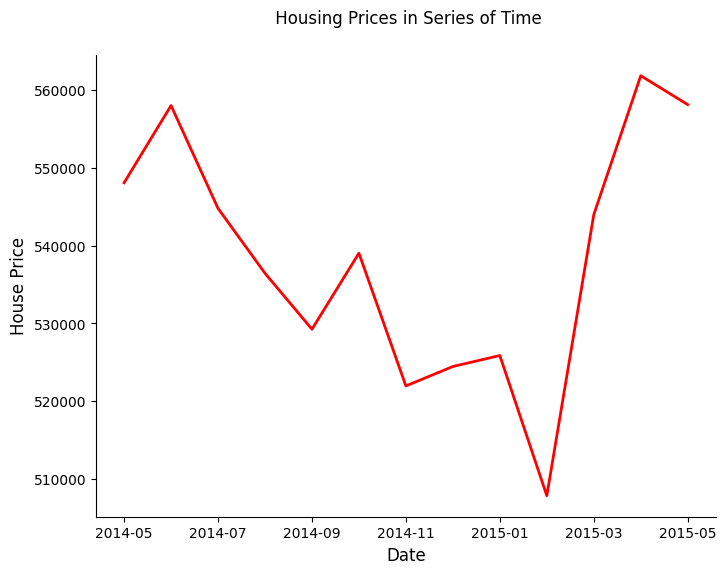

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by date and compute the median price for each date
median_price_by_date = HPI_df.groupby('DateTime')['price'].median()

# Create a line plot of the median price values
fig, ax = plt.subplots(figsize=(8, 6))
median_price_by_date.plot(kind='line', ax=ax, color='Red', linewidth=2, alpha=1)

# Customize the plot
ax.set_title(' Housing Prices in Series of Time', fontsize=12, y=1.05)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('House Price', fontsize=12)
sns.despine()
plt.show()

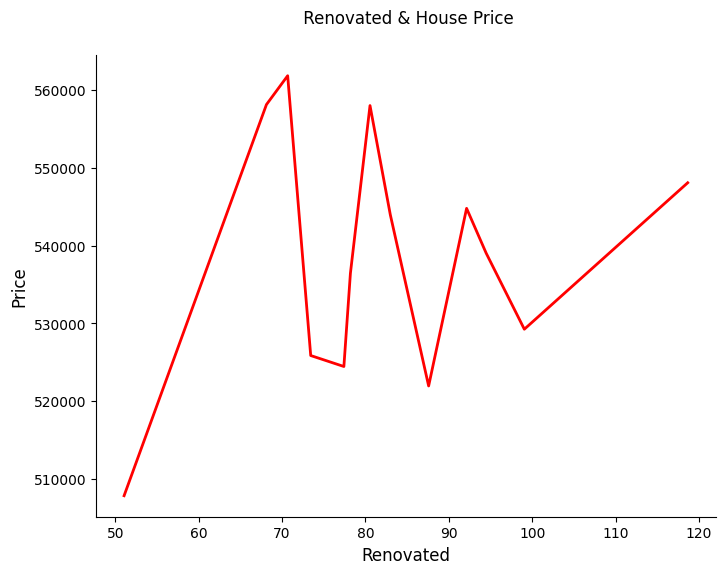

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by date and compute the median price for each date
median_price_by_date = HPI_df.groupby('yr_renovated')['price'].median()

# Create a line plot of the median price values
fig, ax = plt.subplots(figsize=(8, 6))
median_price_by_date.plot(kind='line', ax=ax, color='Red', linewidth=2, alpha=1)

# Customize the plot
ax.set_title(' Renovated & House Price', fontsize=12, y=1.05)
ax.set_xlabel('Renovated', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
sns.despine()
plt.show()


In [32]:
import matplotlib as mpl
mpl.style.use('fast')


In [33]:
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-34-595c9c1376c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(newdata.corr(), yticklabels='auto', annot=True, cmap='YlGn')


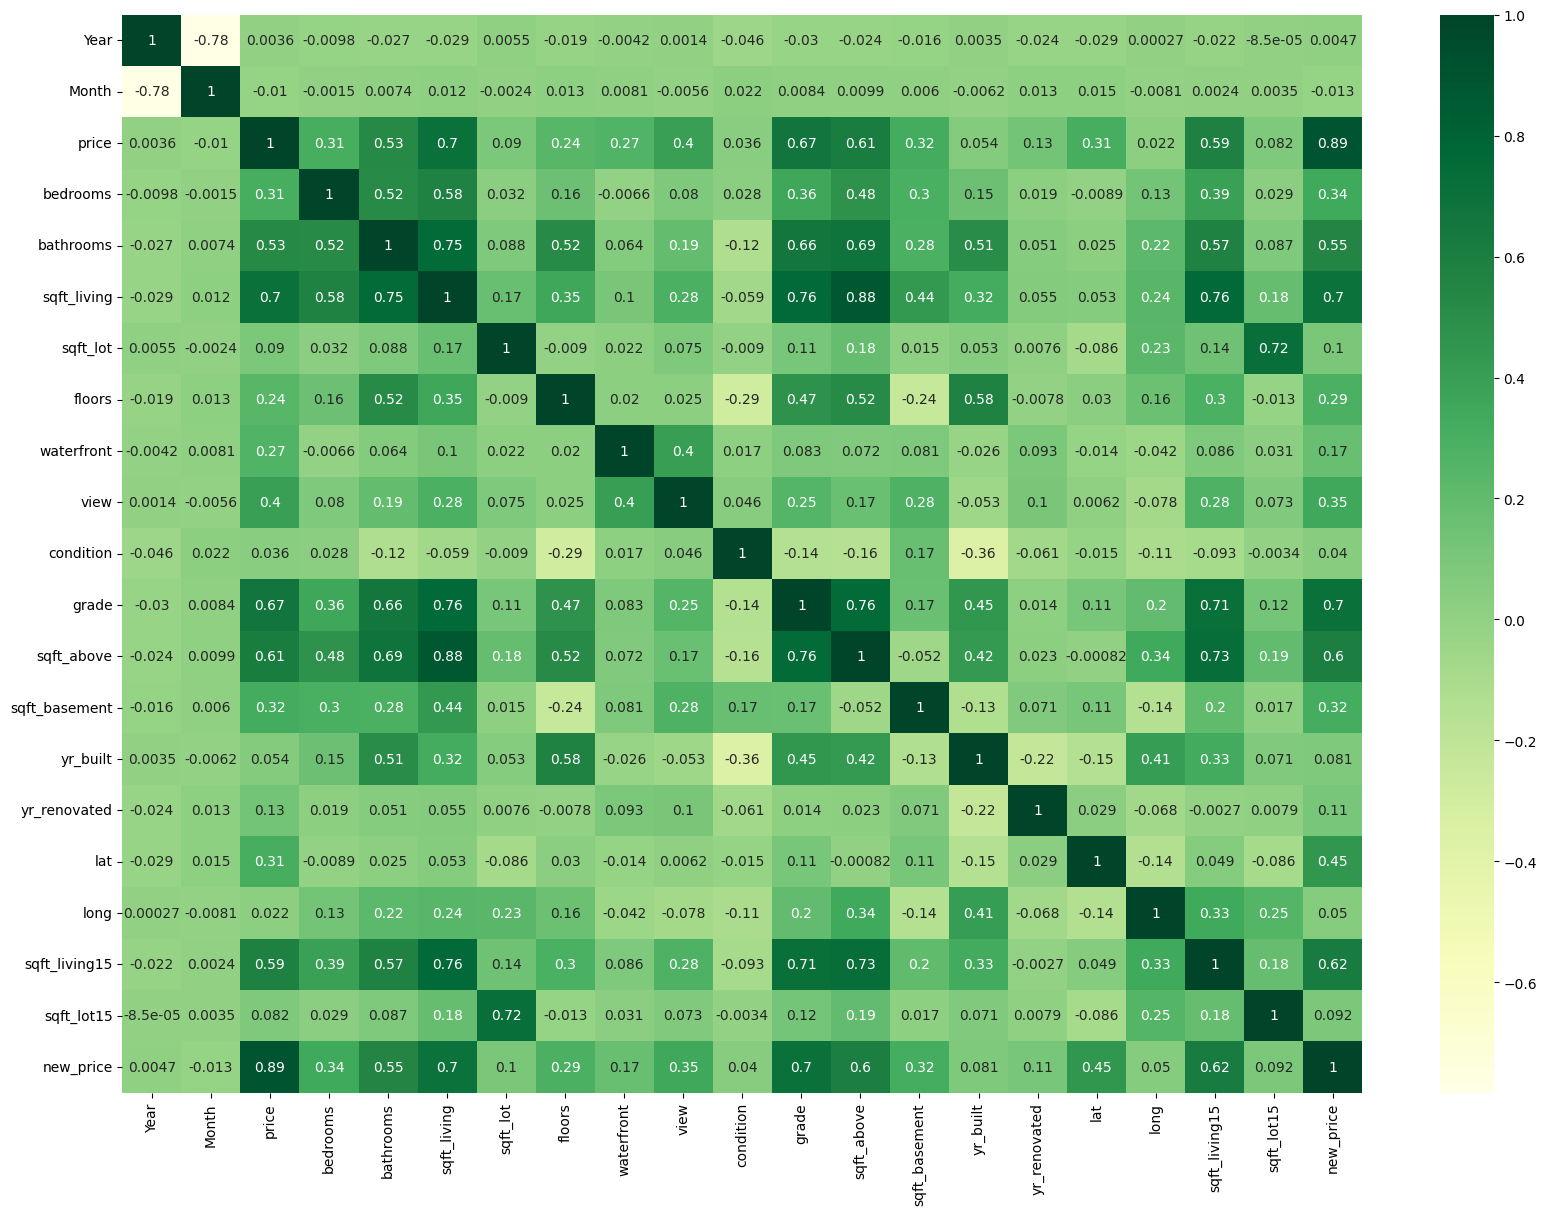

In [34]:
plt.figure(figsize=(20,14))
sns.heatmap(newdata.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

In [35]:
price=newdata[["lat","long","price"]]
min_price=newdata["price"].min()
max_price=newdata["price"].max()
min_price,max_price

(75000.0, 7700000.0)

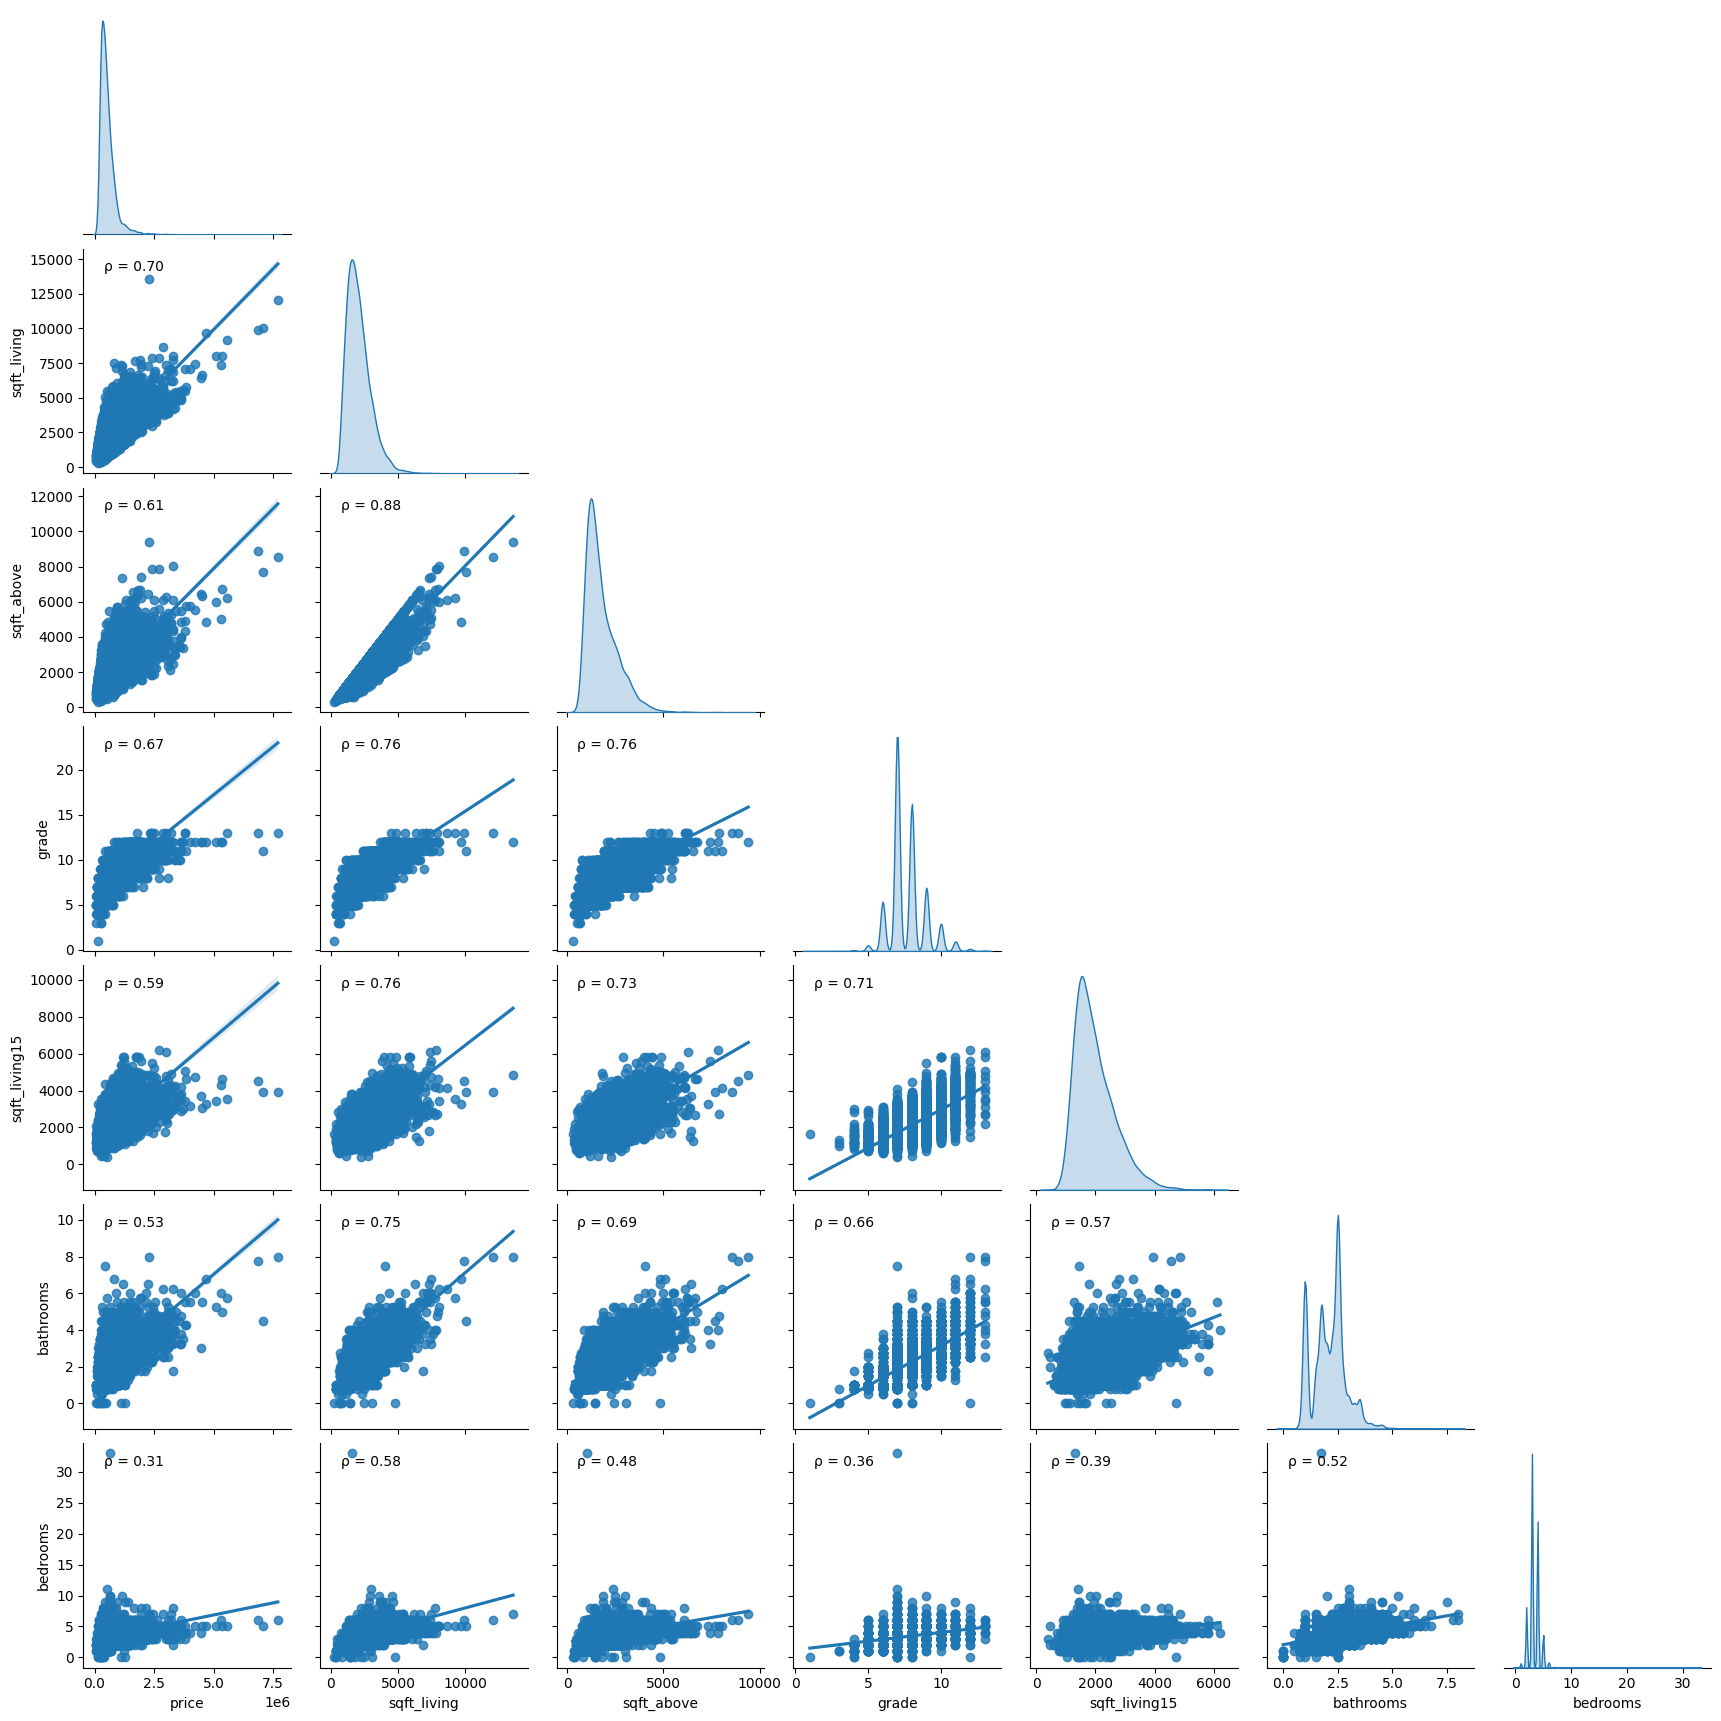

In [36]:
from scipy.stats import pearsonr
pairplot=sns.pairplot(newdata[["price","sqft_living","sqft_above","grade","sqft_living15","bathrooms","bedrooms"]],kind="reg",corner=True,diag_kind="kde");

def corrfunc(x,y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
pairplot.map_lower(corrfunc)
plt.show()

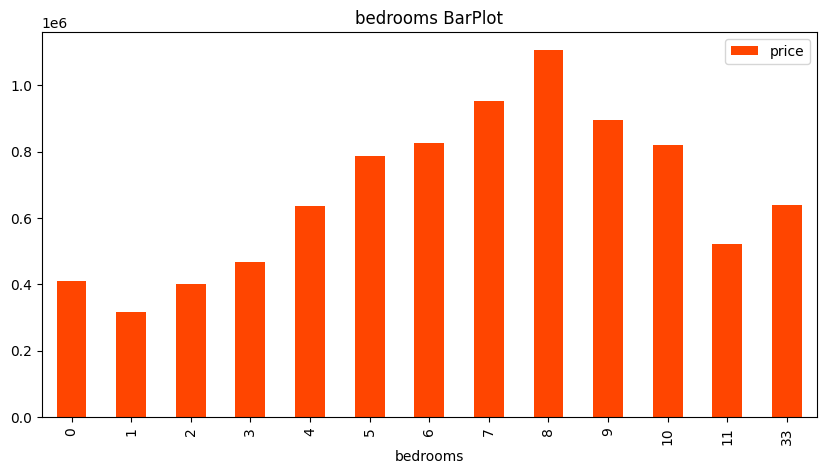

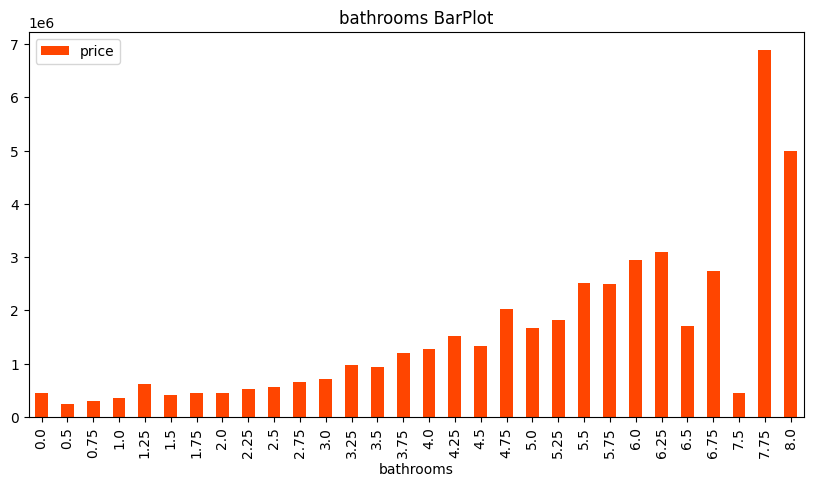

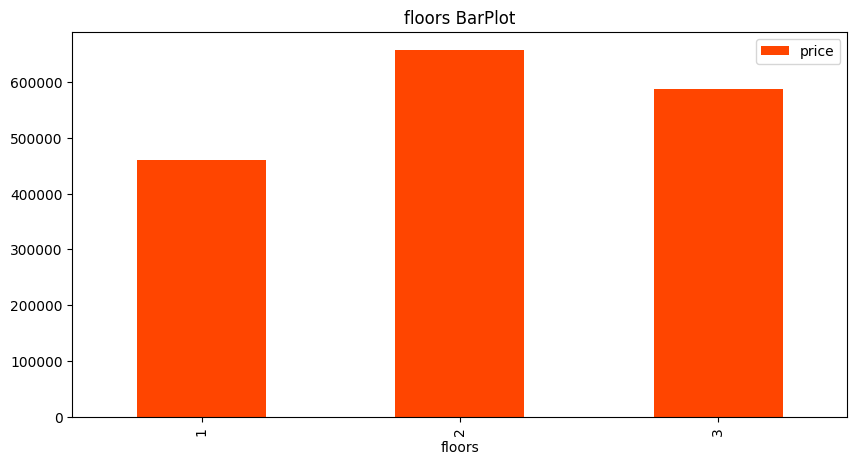

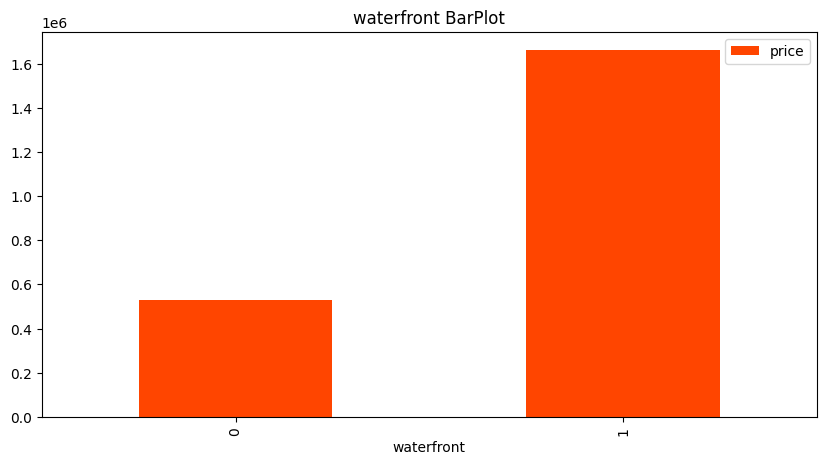

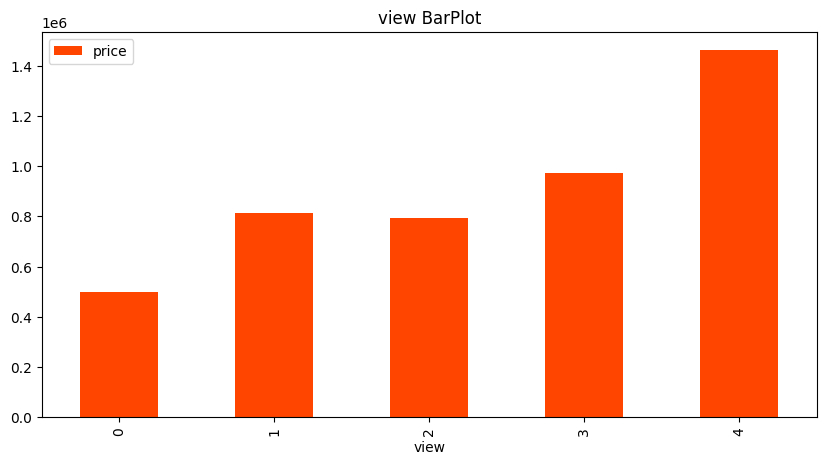

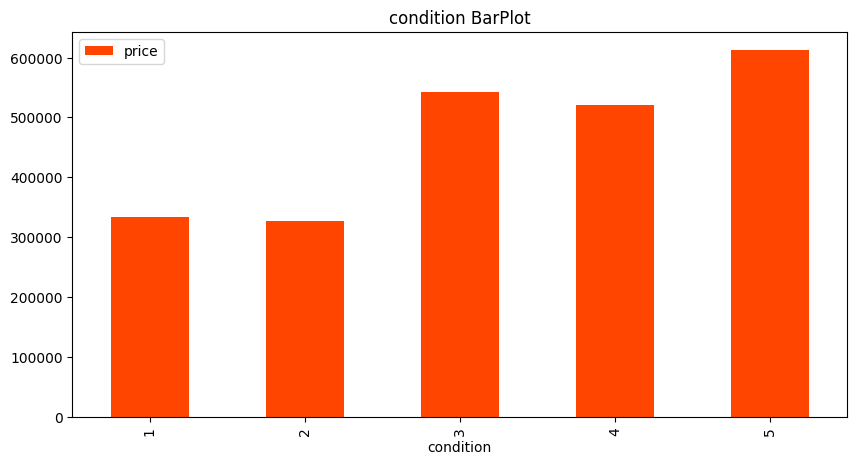

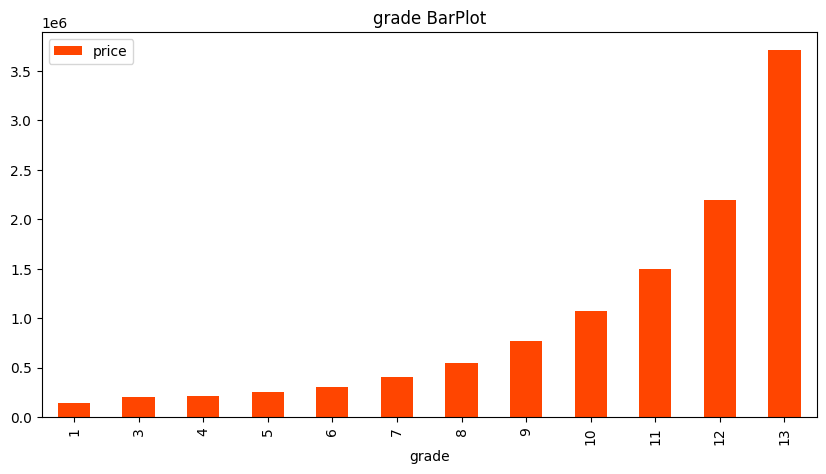

In [37]:
to_plot_list=["bedrooms","bathrooms","floors","waterfront","view","condition","grade"]
  
for i in to_plot_list:
    plt.figure(figsize=(10,5))
    newdata.groupby(i)["price"].mean().plot.bar(color="orangered");
    plt.legend()
    plt.title(i + " BarPlot")
    plt.show()

In [38]:
newdata.corr().abs()["price"].nlargest(20)

<ipython-input-38-d9b2cd09b026>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  newdata.corr().abs()["price"].nlargest(20)


price            1.000000
new_price        0.891654
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Month            0.010081
Name: price, dtype: float64

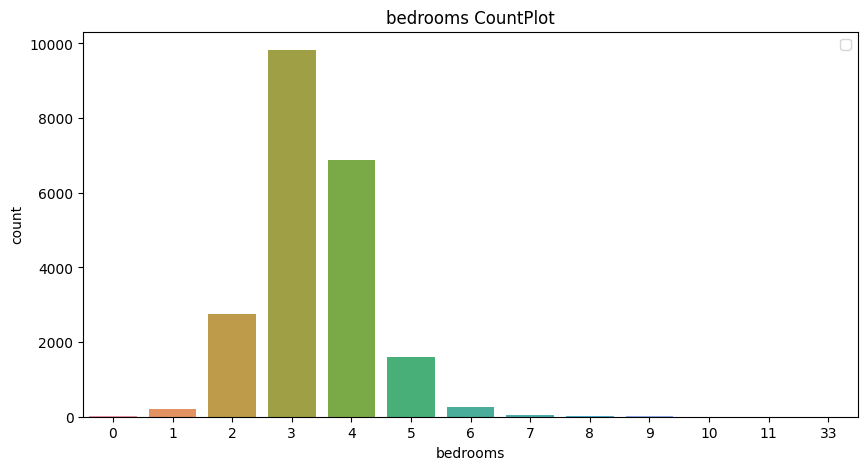

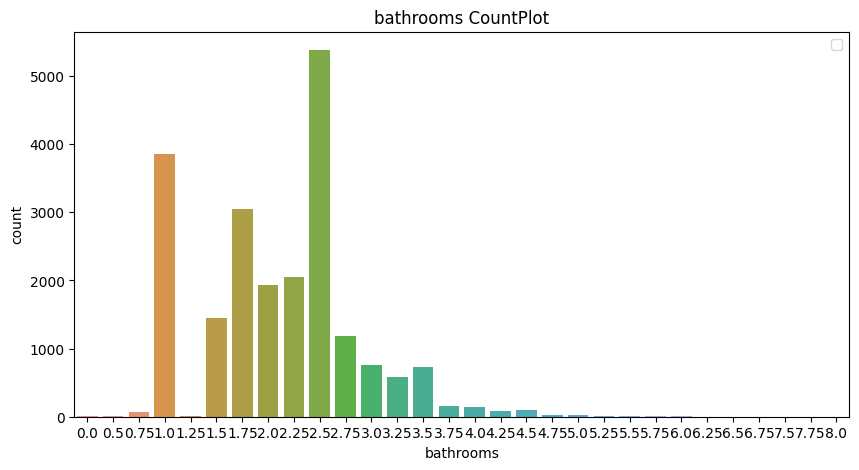

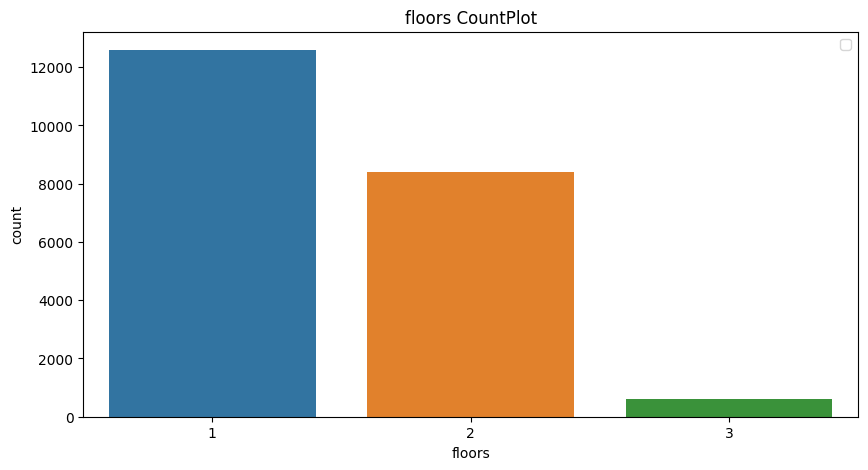

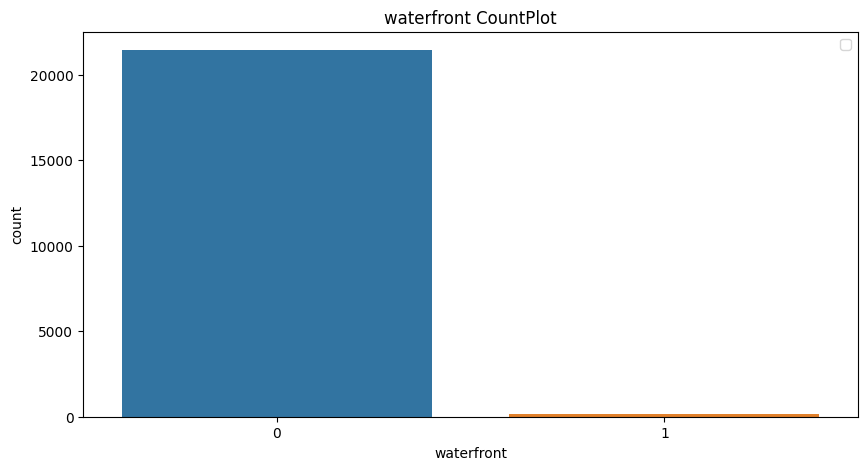

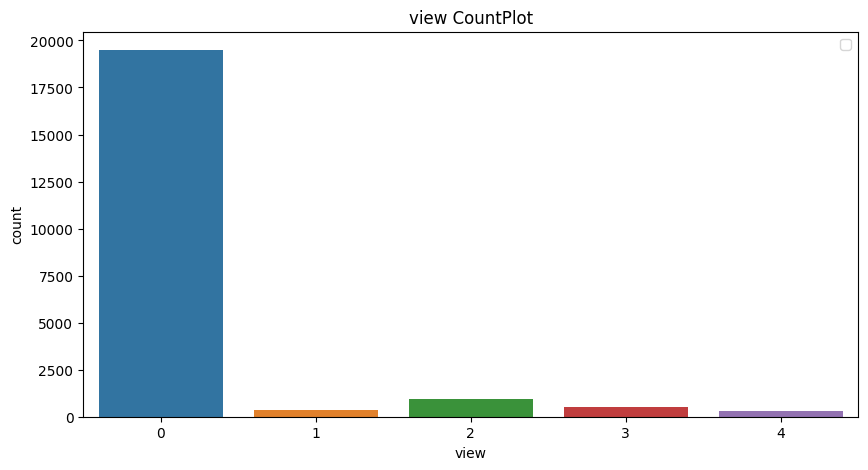

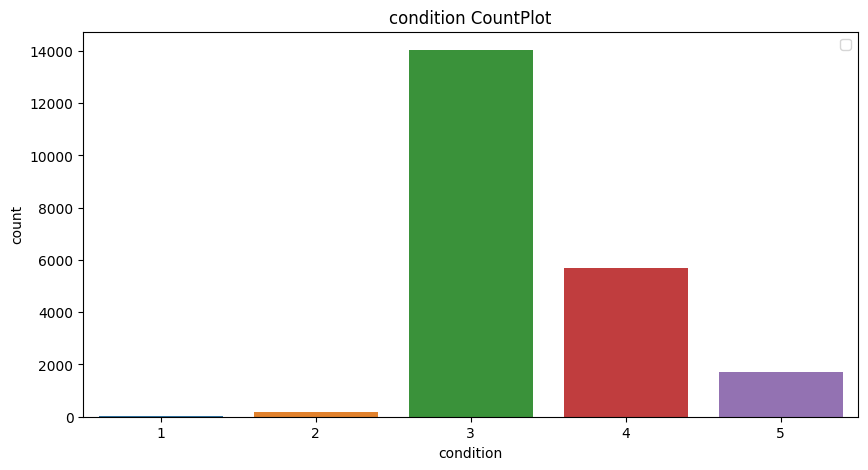

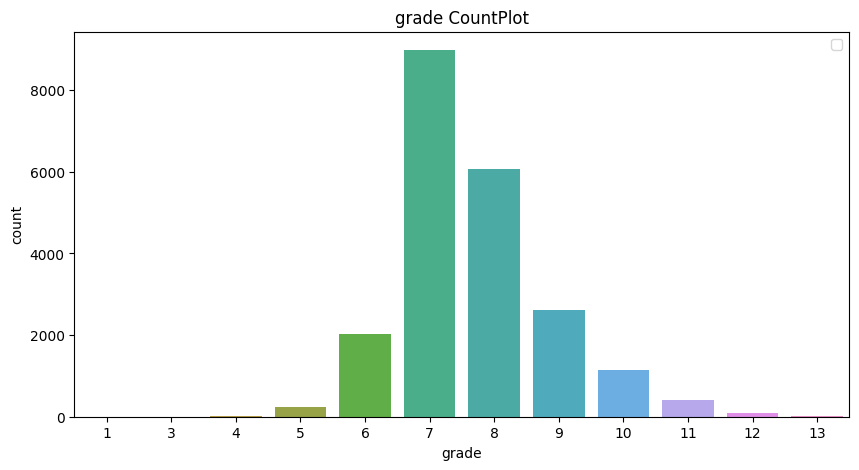

In [39]:
to_plot_list=["bedrooms","bathrooms","floors","waterfront","view","condition","grade"]
  
for i in to_plot_list:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=newdata);
    plt.legend()
    plt.title(i + " CountPlot")
    plt.show()

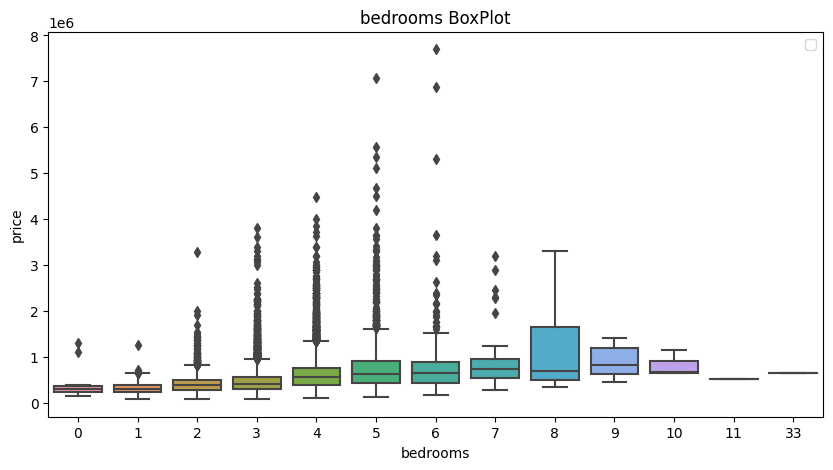

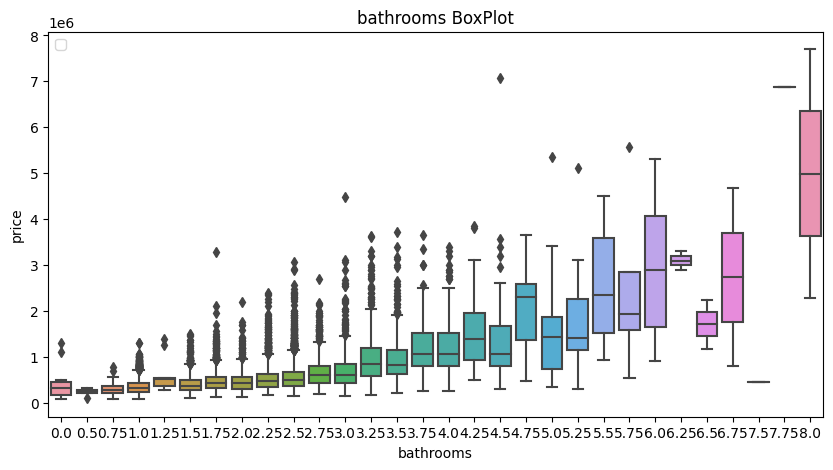

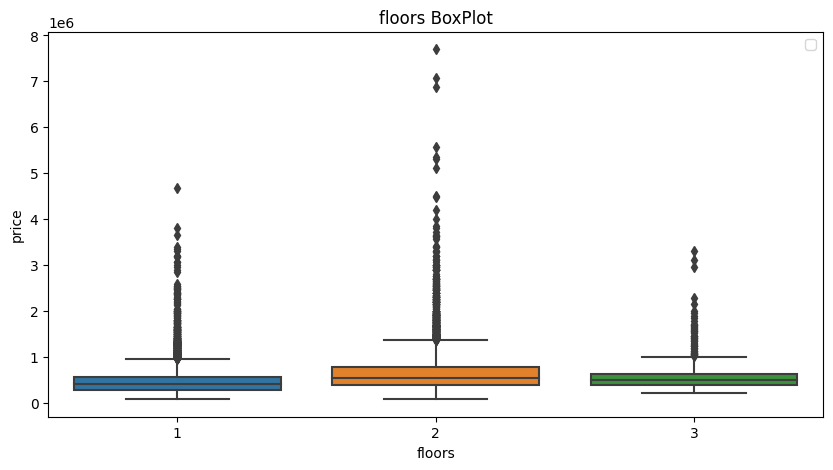

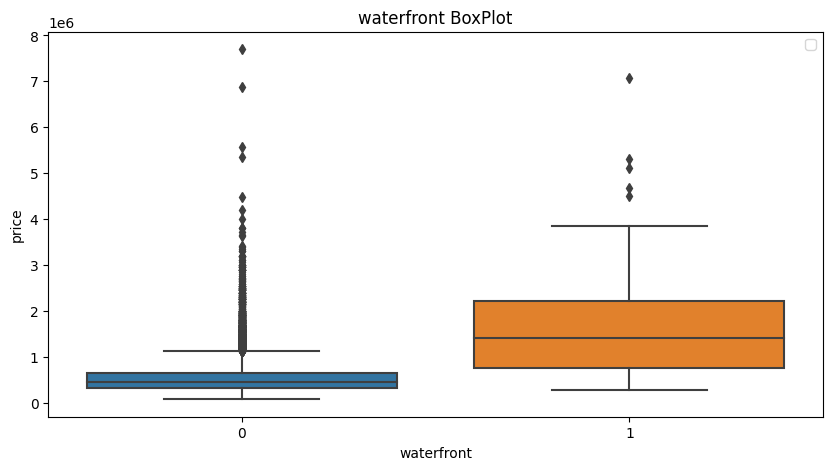

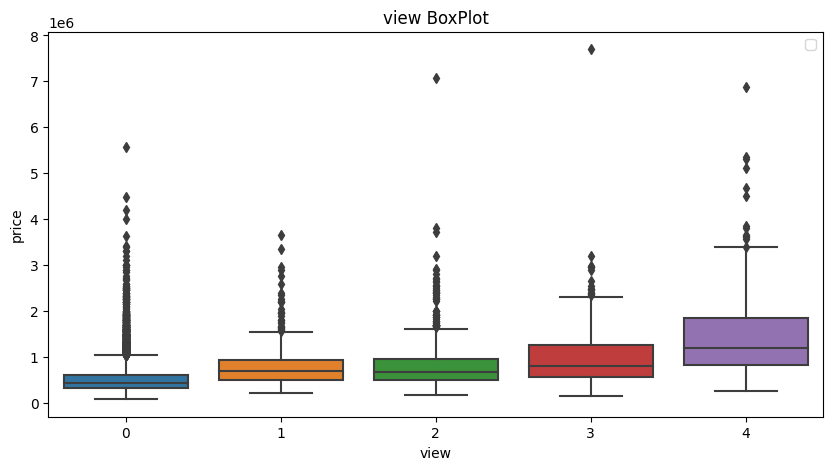

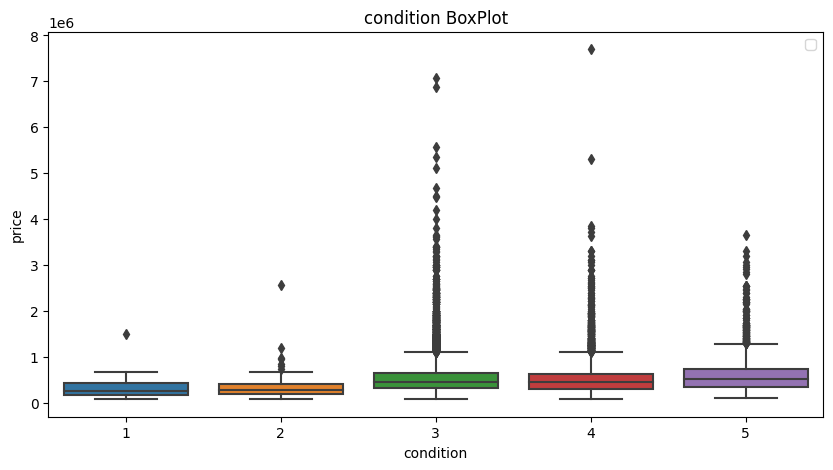

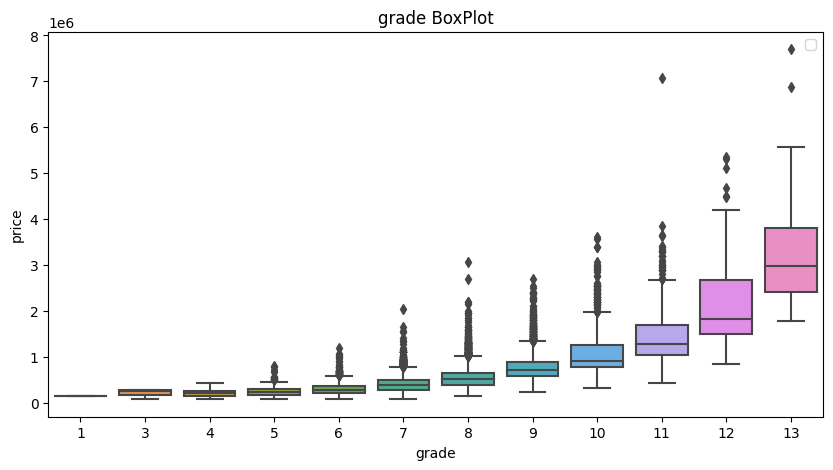

In [40]:
to_plot_list=["bedrooms","bathrooms","floors","waterfront","view","condition","grade"]

for i in to_plot_list:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=i,y="price",data=newdata);
    plt.legend()
    plt.title(i + " BoxPlot")
    plt.show()

<Figure size 1000x500 with 0 Axes>

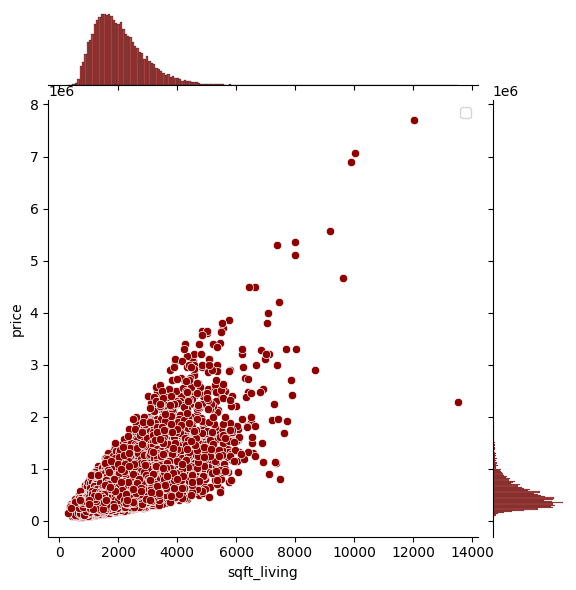

<Figure size 1000x500 with 0 Axes>

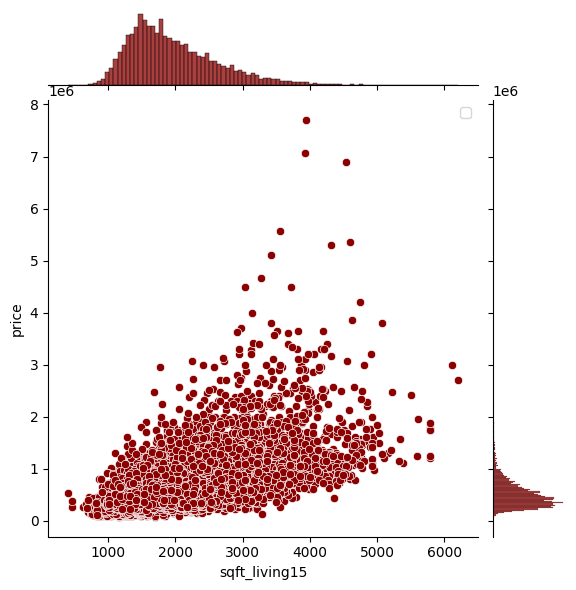

<Figure size 1000x500 with 0 Axes>

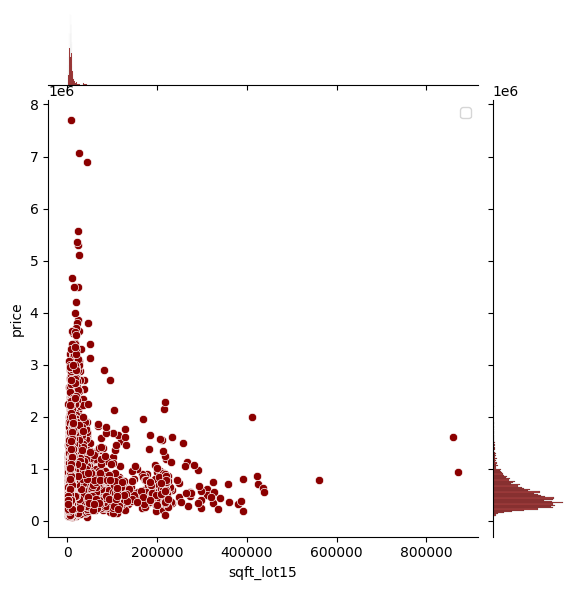

In [41]:
to_plot_list=["sqft_living","sqft_living15","sqft_lot15"]
  

for i in to_plot_list:
    plt.figure(figsize=(10,5));
    sns.jointplot(x=i,y="price",data=newdata,color="darkred");
    plt.legend();
    plt.show();

In [42]:
newdata["bathrooms"] = newdata['bathrooms'].round(0).astype(int)  

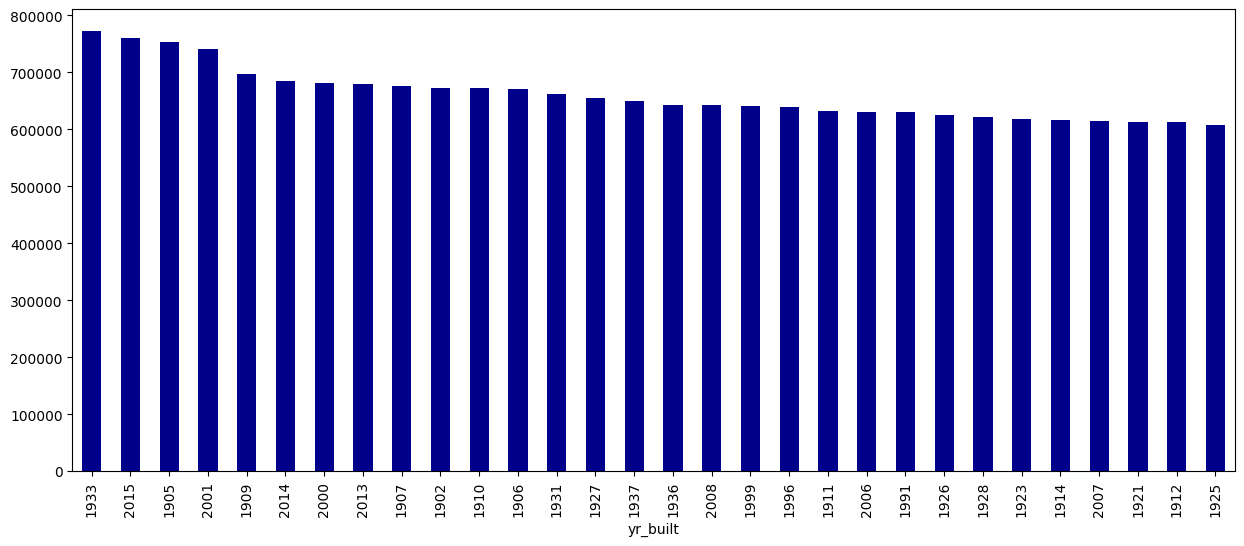

In [43]:
plt.figure(figsize=(15,6))
newdata.groupby("yr_built")["price"].mean().nlargest(30).plot.bar(color="darkblue");

<Axes: xlabel='sqft_living'>

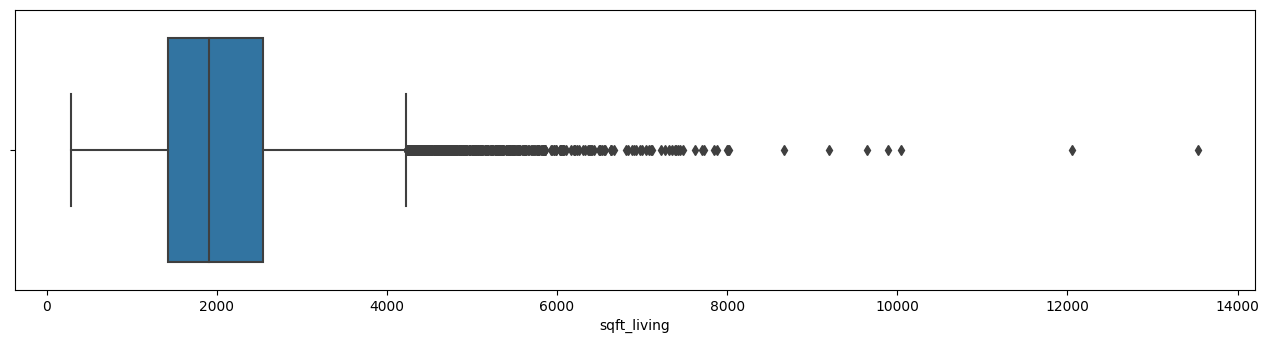

In [44]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = newdata['sqft_living'])



In [45]:
#after visulazation we need to convert the dataframe
newdata = spark.createDataFrame(newdata)

In [46]:
# Drop rows where 'bedrooms' > 10
newdata = newdata.filter(col('bedrooms') <= 10)

In [47]:
from pyspark.sql.functions import col
newdata.filter(col("sqft_lot15") == col("sqft_lot")).select("price", "sqft_lot15","sqft_lot").show()

+---------+----------+--------+
|    price|sqft_lot15|sqft_lot|
+---------+----------+--------+
| 221900.0|      5650|    5650|
| 604000.0|      5000|    5000|
|1225000.0|    101930|  101930|
| 257500.0|      6819|    6819|
| 291850.0|      9711|    9711|
| 468000.0|      6000|    6000|
| 530000.0|      4850|    4850|
| 485000.0|      4300|    4300|
| 385000.0|      4980|    4980|
| 580500.0|      3980|    3980|
| 687500.0|      5000|    5000|
| 861990.0|      5639|    5639|
| 600000.0|      4080|    4080|
| 920000.0|      6000|    6000|
| 885000.0|      5000|    5000|
| 301000.0|      4750|    4750|
| 975000.0|     11049|   11049|
|1325000.0|     20158|   20158|
| 571000.0|      7807|    7807|
| 360000.0|      5000|    5000|
+---------+----------+--------+
only showing top 20 rows



In [48]:
from pyspark.sql.functions import col
newdata.filter(col("bathrooms") >= 7).select("price", "bathrooms", "bedrooms", "sqft_living").show()

+---------+---------+--------+-----------+
|    price|bathrooms|bedrooms|sqft_living|
+---------+---------+--------+-----------+
| 800000.0|        7|       7|       7480|
|7700000.0|        8|       6|      12050|
|4668000.0|        7|       5|       9640|
| 450000.0|        8|       9|       4050|
|6885000.0|        8|       6|       9890|
|2280000.0|        8|       7|      13540|
+---------+---------+--------+-----------+



In [49]:
newdata.show(5)

+----+-----+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|Year|Month|           DateTime|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|
+----+-----+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+
|2014|   10|2014-10-13 00:00:00|221900.0|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|12.309982108920686|
|2014|   12|2014-12-09 00:00:00|538000.0|       3|  

In [50]:
from pyspark.sql.functions import expr
def lower_upper(col_name):
    Q1 = newdata.approxQuantile(col_name, [0.25], 0.01)[0]
    Q3 = newdata.approxQuantile(col_name, [0.75], 0.01)[0]
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

# Apply the lower_upper function to 'sqft_living' column
lower_area, upper_area = lower_upper('sqft_living')



# Print the results
print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")



Lower limit for area: -247.50
Upper limit for area: 4180.50


In [51]:
from pyspark.sql.functions import monotonically_increasing_id
newdata = newdata.withColumn("index", monotonically_increasing_id())

In [52]:
newdata.show()

+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+
|Year|Month|           DateTime|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|index|
+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+
|2014|   10|2014-10-13 00:00:00| 221900.0|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|12.309982108920686|    0|
|2014|   12|2014-12-09 0

In [53]:
# Calculate the upper limits using the lower_upper function defined earlier
lower_area, upper_area = lower_upper('sqft_living')


# Filter rows where 'sqft_living' and 'price' exceed the upper limits
area_outliers = newdata.filter(col('sqft_living') > upper_area)


area_outliers_indices = area_outliers.select("index").rdd.flatMap(lambda x: x).collect()
total_outliers_indices = area_outliers_indices

# Convert the outlier indices to a sorted numpy array
total_outliers_indices_array = sorted(total_outliers_indices)

# Print the outlier indices array
print("Outlier indices array:")
print(total_outliers_indices_array)


Outlier indices array:
[5, 41, 70, 115, 153, 239, 269, 270, 300, 313, 314, 384, 419, 436, 473, 484, 486, 512, 518, 527, 532, 540, 551, 556, 577, 679, 691, 722, 729, 779, 799, 814, 943, 1031, 1055, 1061, 1100, 1122, 1133, 1164, 1171, 1199, 1211, 1261, 1272, 1294, 1315, 1361, 1396, 1448, 1487, 1535, 1539, 1557, 1586, 1622, 1676, 1730, 1732, 1754, 1770, 1807, 1848, 1921, 1931, 1944, 2040, 2085, 2088, 2112, 2125, 2200, 2236, 2254, 2267, 2298, 2321, 2355, 2366, 2383, 2389, 2399, 2411, 2444, 2461, 2578, 2620, 2626, 2668, 2713, 2772, 2846, 2858, 2864, 2884, 2899, 2974, 3020, 3100, 3121, 3204, 3231, 3237, 3271, 3338, 3344, 3384, 3385, 3476, 3514, 3519, 3708, 3721, 3735, 3748, 3761, 3813, 3821, 3871, 3914, 3921, 3954, 4023, 4024, 4032, 4035, 4118, 4149, 4190, 4399, 4406, 4411, 4428, 4468, 4474, 4486, 4581, 4608, 4623, 4626, 4696, 4811, 4859, 4967, 5029, 5049, 5059, 5063, 5117, 5133, 5307, 5449, 5451, 5608, 5667, 5702, 5718, 5751, 5755, 5769, 5831, 5850, 5880, 5936, 5967, 6041, 6045, 6090, 6195,

In [54]:
print("Index column:")
newdata.select("index").show()

Index column:
+-----+
|index|
+-----+
|    0|
|    1|
|    2|
|    3|
|    4|
|    5|
|    6|
|    7|
|    8|
|    9|
|   10|
|   11|
|   12|
|   13|
|   14|
|   15|
|   16|
|   17|
|   18|
|   19|
+-----+
only showing top 20 rows



In [ ]:
# Drop the rows corresponding to the total outliers
newdata = newdata.filter(~col('index').isin(total_outliers_indices_array))

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


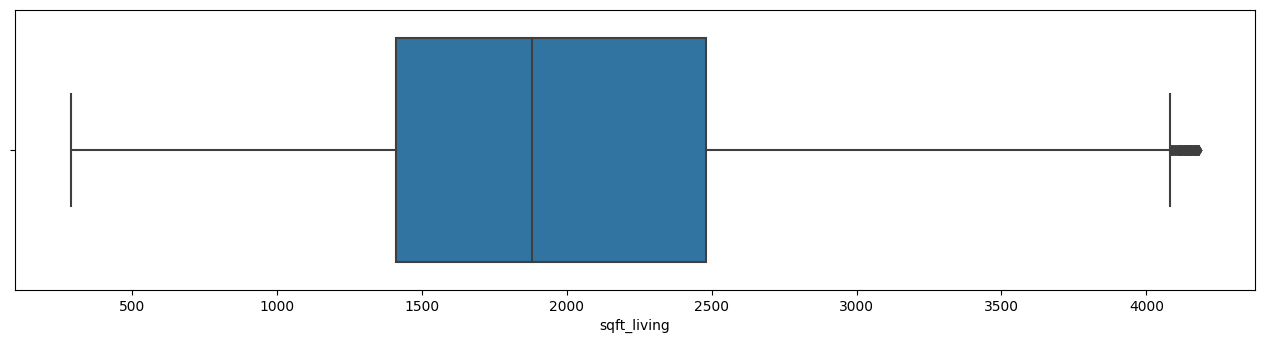

In [ ]:
newdata = newdata.toPandas()
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = newdata['sqft_living'])
newdata = spark.createDataFrame(newdata)

In [55]:
newdata.show()

+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+
|Year|Month|           DateTime|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|index|
+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+
|2014|   10|2014-10-13 00:00:00| 221900.0|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|12.309982108920686|    0|
|2014|   12|2014-12-09 0

In [56]:
from pyspark.sql.functions import col
newdata.filter(col("Year")-col("yr_built")<0).select("Year","yr_built").show()

+----+--------+
|Year|yr_built|
+----+--------+
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
|2014|    2015|
+----+--------+



In [57]:
newdata = newdata.filter((newdata["Year"]-newdata["yr_built"])>=0)

In [58]:
from pyspark.sql.functions import when
newdata = newdata.withColumn("is_renovated", when(newdata["yr_renovated"] > 0, 1).otherwise(0))

In [59]:
newdata.columns

['Year',
 'Month',
 'DateTime',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'new_price',
 'index',
 'is_renovated']

In [60]:
newdata.show(5)

+----+-----+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+------------+
|Year|Month|           DateTime|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|index|is_renovated|
+----+-----+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+------------+
|2014|   10|2014-10-13 00:00:00|221900.0|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|12.309982108920

In [61]:
from pyspark.sql.functions import rand
newdata.select(["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]).orderBy(rand()).show(7)

+-----------+--------+----------+-------------+-------------+----------+
|sqft_living|sqft_lot|sqft_above|sqft_basement|sqft_living15|sqft_lot15|
+-----------+--------+----------+-------------+-------------+----------+
|       2540|   11500|      1640|          900|         2820|      9800|
|       4160|   47480|      4160|            0|         3400|     40428|
|       2340|   51836|      1510|          830|         2060|     77536|
|       1070|    5750|      1070|            0|         1420|      6500|
|       2480|    8563|      2480|            0|         2460|      8660|
|       2230|    5743|      2230|            0|         2490|      6300|
|       2500|    4270|      2500|            0|         2420|      4205|
+-----------+--------+----------+-------------+-------------+----------+
only showing top 7 rows



In [62]:
from pyspark.sql.functions import col
newdata.filter(col("sqft_living") == col("sqft_above")) \
    .select("sqft_living", "sqft_above", "sqft_lot", "sqft_basement", "sqft_living15", "sqft_lot15") \
    .show(7)


+-----------+----------+--------+-------------+-------------+----------+
|sqft_living|sqft_above|sqft_lot|sqft_basement|sqft_living15|sqft_lot15|
+-----------+----------+--------+-------------+-------------+----------+
|       1180|      1180|    5650|            0|         1340|      5650|
|        770|       770|   10000|            0|         2720|      8062|
|       1680|      1680|    8080|            0|         1800|      7503|
|       1715|      1715|    6819|            0|         2238|      6819|
|       1060|      1060|    9711|            0|         1650|      9711|
|       1890|      1890|    6560|            0|         2390|      7570|
|       1430|      1430|   19901|            0|         1780|     12697|
+-----------+----------+--------+-------------+-------------+----------+
only showing top 7 rows



In [63]:
# Add a new column 'total_room' to the DataFrame
newdata = newdata.withColumn("total_room", col("bedrooms") + col("bathrooms"))


In [64]:
newdata.show(5)

+----+-----+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+------------+----------+
|Year|Month|           DateTime|   price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|index|is_renovated|total_room|
+----+-----+-------------------+--------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+------------+----------+
|2014|   10|2014-10-13 00:00:00|221900.0|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|       

In [65]:
from pyspark.sql.functions import count, col
duplicates = newdata.groupBy(col("lat")).agg(count("*").alias("count")).filter(col("count") > 1)


In [66]:
duplicates.show()

+-------+-----+
|    lat|count|
+-------+-----+
|47.6827|   11|
|47.4485|    7|
|47.5495|    7|
|47.5906|    4|
|47.7146|    5|
|47.7571|    3|
|47.5344|    9|
|47.6071|    6|
|47.4852|    8|
|47.3258|    5|
|47.6151|    4|
|47.3293|    6|
|47.5715|    5|
|47.4662|    2|
|47.4972|    5|
|47.7316|    6|
|47.3508|    2|
|47.7776|    3|
| 47.667|    8|
|47.7576|    5|
+-------+-----+
only showing top 20 rows



In [67]:
from pyspark.sql.functions import count, col
duplicates = newdata.groupBy(col("is_renovated"),col("price"),col("lat"), col("long")).agg(count("*").alias("count")).filter(col("count") > 1)

In [68]:
duplicates.show()

+------------+--------+-------+--------+-----+
|is_renovated|   price|    lat|    long|count|
+------------+--------+-------+--------+-----+
|           0|250000.0|47.3611|-122.047|    2|
|           0|539950.0|47.6987|-122.365|    2|
|           0|625000.0| 47.667|-122.333|    2|
|           0|629950.0|47.6425|-122.374|    2|
|           1|550000.0|47.6499|-122.088|    2|
|           0|350000.0|47.7453|-121.984|    2|
|           0|350000.0|47.7351|-122.295|    2|
|           0|245000.0|47.5918|-122.295|    2|
|           0|259950.0|47.5213|-122.357|    2|
|           0|300000.0|47.3992|-122.163|    2|
|           0|499950.0| 47.596|-122.298|    2|
|           0|555000.0|47.5644|-122.093|    2|
|           0|585000.0|47.5443|-122.172|    2|
|           0|379900.0|47.5442|-122.371|    2|
|           0|580000.0|47.6681|-122.355|    2|
|           0|399950.0|47.6413|-122.329|    2|
|           0|659950.0|47.4827|-122.131|    2|
|           0|529500.0|47.5818|-122.402|    2|
|           0

In [69]:
duplicates.count()

22

In [70]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

newdatas=["Year", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition",
                "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "sqft_living15", "sqft_lot15",
                "is_renovated", "total_room"]

assembler =VectorAssembler(inputCols=newdatas,outputCol='features')


# Create a vector assembler to assemble the feature columns
assembler = VectorAssembler(inputCols=newdatas, outputCol="features")
# output=assembler.transform(newdata)
assembled_data=assembler.transform(newdata)


# Prepare the data for training and testing
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=1)


# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="price")

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", metricName="mse")
mse = evaluator.evaluate(predictions)
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 36594294333.33918
Root Mean Squared Error (RMSE): 191296.35211717756
R^2 Score: 0.7202224085531821


#USING GRADIENT BOOSTING REGRESSOR

In [71]:
newdata.show()

+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+------------+----------+
|Year|Month|           DateTime|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|index|is_renovated|total_room|
+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+-----+------------+----------+
|2014|   10|2014-10-13 00:00:00| 221900.0|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|   

In [72]:
newdata = newdata.drop("index")
newdata.show()

+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+------------+----------+
|Year|Month|           DateTime|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|         new_price|is_renovated|total_room|
+----+-----+-------------------+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+------------------+------------+----------+
|2014|   10|2014-10-13 00:00:00| 221900.0|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5

In [73]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
newdata = newdata.toPandas()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [74]:
X=newdata.drop(["zipcode","Month","new_price", "price","DateTime","long"],axis=1)#from heat map corelations we drop this column to make better prediction
y=np.log(newdata["price"])

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [77]:
gbm_model = GradientBoostingRegressor(max_depth=7,random_state=42)
gbm_model.fit(x_train, y_train)
y_pred = gbm_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.18198488665342208

In [78]:
r2_score(y_test,y_pred)

0.879039876683385

In [79]:
y_tr_pred=gbm_model.predict(x_train)

In [80]:
r2_score(y_train,y_tr_pred)

0.93593932986862

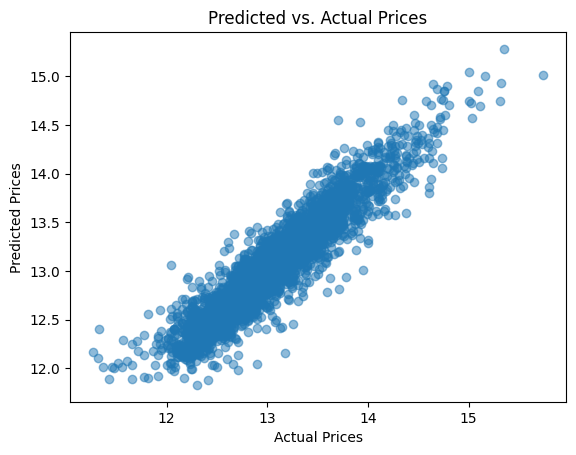

In [81]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.show()


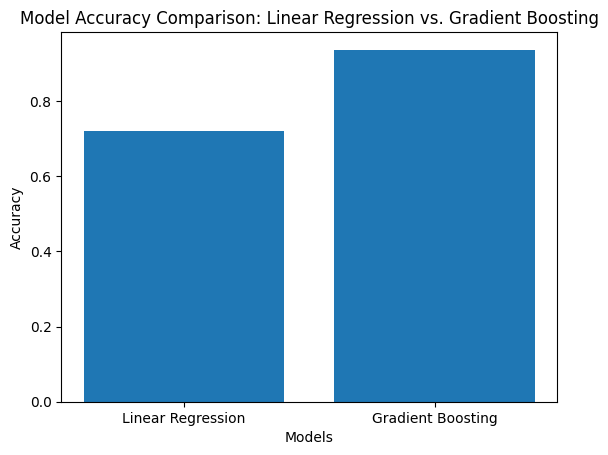

In [164]:
import matplotlib.pyplot as plt

# Accuracy values for linear regression and gradient boosting models
linear_regression_accuracy = r2
gradient_boosting_accuracy = r2_score(y_train,y_tr_pred)
# Create a bar diagram
models = ['Linear Regression', 'Gradient Boosting']
accuracies = [linear_regression_accuracy, gradient_boosting_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Linear Regression vs. Gradient Boosting')

plt.show()


In [157]:
import random
import pandas as pd

# Create an empty list to store rows
rows = []

for i in range(100):
    # Generate random values for each column
    year = random.randint(2015, 2022)
    bedrooms = random.randint(1, 10)
    bathrooms = random.randint(1, 5)
    sqft_living = random.randint(500, 10000)
    sqft_lot = random.randint(1000, 20000)
    floors = random.randint(1, 3)
    waterfront = random.choice([0, 1])
    view = random.randint(0, 4)
    condition = random.randint(1, 5)
    grade = random.randint(1, 13)
    sqft_above = random.randint(500, 8000)
    sqft_basement = random.randint(0, 8000)
    yr_built = random.randint(1900, 2022)
    yr_renovated = random.choice([0, random.randint(1900, 2022)])
    lat = random.uniform(47.0, 48.0)
    sqft_living15 = random.randint(500, 8000)
    sqft_lot15 = random.randint(1000, 20000)
    is_renovated = int(yr_renovated != 0)
    total_room = bedrooms + bathrooms
    
    # Append the randomly generated values as a dictionary to the list
    rows.append({'Year': year, 'bedrooms': bedrooms, 'bathrooms': bathrooms, 'sqft_living': sqft_living,
                 'sqft_lot': sqft_lot, 'floors': floors, 'waterfront': waterfront, 'view': view,
                 'condition': condition, 'grade': grade, 'sqft_above': sqft_above,
                 'sqft_basement': sqft_basement, 'yr_built': yr_built, 'yr_renovated': yr_renovated,
                 'lat': lat, 'sqft_living15': sqft_living15, 'sqft_lot15': sqft_lot15,
                 'is_renovated': is_renovated, 'total_room': total_room})

# Concatenate the rows into a DataFrame
storedata = pd.DataFrame(rows)


In [158]:
# Use the predict() method of the machine learning model to get the predicted house prices
predicted_prices = gbm_model.predict(storedata)

# Convert the predicted prices back to their original scale (if necessary)
predicted_prices = np.exp(predicted_prices)

# Format the predicted prices as strings with two decimal places
formatted_prices = [format(price, '.2f') for price in predicted_prices]

# Print the formatted_prices
print(formatted_prices)


['763735.17', '790822.28', '1049497.52', '448387.82', '391057.98', '410464.97', '888150.95', '778089.92', '346672.97', '1062337.47', '444633.22', '403176.08', '320231.36', '534517.02', '711069.90', '1445196.59', '817903.31', '435898.62', '1970398.73', '645260.63', '475133.25', '888429.05', '281671.90', '649431.27', '309272.73', '342302.28', '384990.55', '936353.06', '380669.24', '871826.30', '506733.44', '630506.16', '463231.80', '700660.47', '4266661.82', '335626.94', '450260.47', '630636.97', '922370.76', '957509.61', '763459.98', '556246.05', '342512.34', '522447.70', '1040823.22', '395691.53', '453200.55', '730981.95', '1585689.95', '424460.51', '368844.23', '788682.59', '2590585.84', '343204.92', '3611983.28', '755158.95', '361422.41', '914124.77', '627110.98', '709635.59', '456277.56', '741120.15', '1090580.85', '625460.63', '325702.55', '414495.05', '663943.85', '780129.22', '338233.02', '1535481.00', '328384.02', '353587.87', '1520530.68', '1033677.60', '437105.06', '415570.78'

In [159]:
# Add a new column of predicted prices to the newdata dataframe
storedata = storedata.assign(predicted_price=predicted_prices)
storedata = spark.createDataFrame(storedata)

In [160]:
storedata.show()

+----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+------------------+-------------+----------+------------+----------+------------------+
|Year|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|               lat|sqft_living15|sqft_lot15|is_renovated|total_room|   predicted_price|
+----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+------------------+-------------+----------+------------+----------+------------------+
|2020|       7|        1|        667|   10496|     2|         1|   0|        1|   11|      2302|          768|    1921|           0|47.959985575705446|         7308|     15598|           0|         8|  763735.171444485|
|2018|       2|        2|       5774|   10678|     3|         0|   1|        1|   11|       900|         4034|    1903| 

In [161]:
import pandas as pd
storedata = storedata.toPandas()
# Create a new 'Year' column
storedata['Year'] = storedata['Year'].astype(int)

# Group data by year and calculate mean HPI for other columns
HPI_df = storedata.groupby('Year').mean(numeric_only=True)

# Reset index
HPI_df = HPI_df.reset_index()

# Print HPI_df
print(HPI_df)


   Year  bedrooms  bathrooms  sqft_living      sqft_lot    floors  waterfront  \
0  2015  5.444444   3.444444  5312.666667  11752.277778  2.111111    0.277778   
1  2016  7.727273   2.636364  4971.272727  11888.090909  2.363636    0.454545   
2  2017  6.500000   3.333333  4469.833333  12128.833333  1.916667    0.166667   
3  2018  5.636364   3.909091  5331.636364  12160.181818  2.090909    0.545455   
4  2019  4.500000   2.833333  6630.666667   9915.333333  2.166667    0.583333   
5  2020  5.062500   3.250000  4733.125000   9167.437500  1.812500    0.437500   
6  2021  6.636364   3.272727  6066.090909  14760.636364  2.272727    0.454545   
7  2022  5.111111   4.111111  6074.777778  10716.888889  2.222222    0.555556   

       view  condition     grade   sqft_above  sqft_basement     yr_built  \
0  2.055556   3.000000  6.888889  4156.777778    3548.833333  1959.277778   
1  1.818182   2.818182  7.727273  3903.727273    3468.000000  1942.454545   
2  1.916667   2.750000  5.750000  4714.

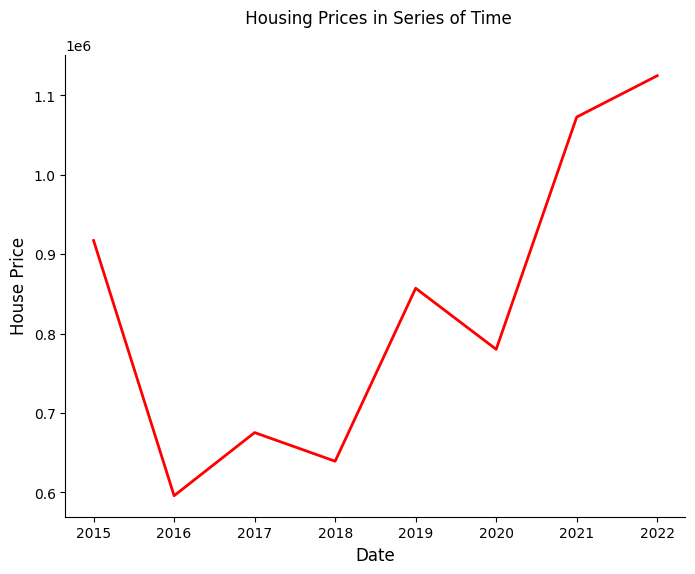

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by date and compute the median price for each date
median_price_by_date = HPI_df.groupby('Year')['predicted_price'].median()

# Create a line plot of the median price values
fig, ax = plt.subplots(figsize=(8, 6))
median_price_by_date.plot(kind='line', ax=ax, color='Red', linewidth=2, alpha=1)

# Customize the plot
ax.set_title(' Housing Prices in Series of Time', fontsize=12, y=1.05)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('House Price', fontsize=12)
sns.despine()
plt.show()

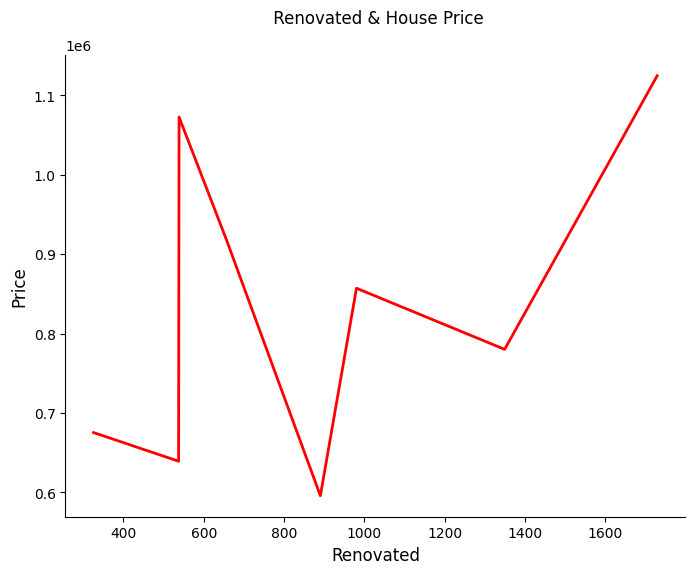

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by date and compute the median price for each date
median_price_by_date = HPI_df.groupby('yr_renovated')['predicted_price'].median()

# Create a line plot of the median price values
fig, ax = plt.subplots(figsize=(8, 6))
median_price_by_date.plot(kind='line', ax=ax, color='Red', linewidth=2, alpha=1)

# Customize the plot
ax.set_title(' Renovated & House Price', fontsize=12, y=1.05)
ax.set_xlabel('Renovated', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
sns.despine()
plt.show()
